## Holiday Package Prediciton

### 1) Problem statement.
"Trips & Travel.Com" company wants to enable and establish a viable business model to expand the customer base.
One of the ways to expand the customer base is to introduce a new offering of packages. Currently, there are 5 types of packages the company is offering * Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages. However, the marketing cost was quite high because customers were contacted at random without looking at the available information.
The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being.
However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.
### 2) Data Collection.
The Dataset is collected from https://www.kaggle.com/datasets/susant4learning/holiday-package-purchase-prediction
The data consists of 20 column and 4888 rows.

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Process in the Project :
1. Importing the Data
2. Understanding the Data
3. Data Cleaning
    - Checking The DataType
    - Checking for Duplicates
    - Handling the Null Values
    - Try to reduce the Features
    - Handling the Outliers
    - Visulaisation
4. Feature Selection
5. 

# 1. Importing the Data

In [35]:
df=pd.read_csv(r'E:\MLproject\notebook\Travel.csv')

In [36]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


# 2. Understanding

In [37]:
no_rows,no_columns=df.shape
print('Number of Rows:',no_rows)
print('Number of Columns:',no_columns)

Number of Rows: 4888
Number of Columns: 20


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [39]:
df.describe()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
count,4888.000000,4888.000000,4662.000000,4888.000000,4637.000000,4888.000000,4843.000000,4862.000000,4748.000000,4888.000000,4888.000000,4888.000000,4822.000000,4655.000000
mean,202443.500000,0.188216,37.622265,1.654255,15.490835,2.905074,3.708445,3.581037,3.236521,0.290917,3.078151,0.620295,1.187267,23619.853491
std,1411.188388,0.390925,9.316387,0.916583,8.519643,0.724891,1.002509,0.798009,1.849019,0.454232,1.365792,0.485363,0.857861,5380.698361
min,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,201221.750000,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20346.000000
50%,202443.500000,0.000000,36.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22347.000000
75%,203665.250000,0.000000,44.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25571.000000
max,204887.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


In [40]:
df.describe(include='object')

,TypeofContact,Occupation,Gender,ProductPitched,MaritalStatus,Designation
count,4863,4888,4888,4888,4888,4888
unique,2,4,3,5,4,5
top,Self Enquiry,Salaried,Male,Basic,Married,Executive
freq,3444,2368,2916,1842,2340,1842


In [41]:
# Seeing the number unique values
for i in df.columns:
    print('COLUMN NAME:',i)
    print('Number of unique values:',df[i].nunique())
    a=df[i].nunique()
    if a <= 10 :
        print(df[i].value_counts())
    print('---------------------------------')

COLUMN NAME: CustomerID
Number of unique values: 4888
---------------------------------
COLUMN NAME: ProdTaken
Number of unique values: 2
ProdTaken
0    3968
1     920
Name: count, dtype: int64
---------------------------------
COLUMN NAME: Age
Number of unique values: 44
---------------------------------
COLUMN NAME: TypeofContact
Number of unique values: 2
TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64
---------------------------------
COLUMN NAME: CityTier
Number of unique values: 3
CityTier
1    3190
3    1500
2     198
Name: count, dtype: int64
---------------------------------
COLUMN NAME: DurationOfPitch
Number of unique values: 34
---------------------------------
COLUMN NAME: Occupation
Number of unique values: 4
Occupation
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: count, dtype: int64
---------------------------------
COLUMN NAME: Gender
Number of unique values: 3
Gender
Male      

# 3. DATA CLEANING 
1. Checking the DataType
2. Checking the Spelling of Values in Categorical Columns
3. Handling the Dulicates
4. Handling the Null Values
5. Trying to Reduce The Features By Combining 
6. Handling the Outliers
7. Visual Understanding

## 3.1.Checking the DataType 

In [42]:
mixed_columns = []
for i in df.columns:
    types_in_col = df[i].dropna().map(type).nunique()
    if types_in_col > 1:
        mixed_columns.append(col)
    mixed_columns
if len(mixed_columns)==0:
    print('There is no Mixed Datatype in the Columns')

There is no Mixed Datatype in the Columns


## 3.2. Checking the Spelling of Values In Categorical Cloumns

#### we having a Spelling Error in Gender Cloumn:
Fe male-->Female

In [43]:
print('Before')
print(df['Gender'].unique())
df['Gender']= df['Gender'].replace('Fe Male','Female')
print('After')
print(df['Gender'].unique())

Before
['Female' 'Male' 'Fe Male']
After
['Female' 'Male']


#### We having Single and Unmarried which both are the same

In [44]:
print(df['MaritalStatus'].unique())

['Single' 'Divorced' 'Married' 'Unmarried']


In [45]:
df['MaritalStatus']= df['MaritalStatus'].replace('Single','Unmarried')

In [46]:
print(df['MaritalStatus'].unique())

['Unmarried' 'Divorced' 'Married']


## 3.2.Checking for Duplicates

In [47]:
df.duplicated().sum()

0

## 3.3.Checking For Null Values

In [48]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [49]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [50]:
def rank_columns_by_group_age_variance(df, target_col):
    column_variances = {}

    # Loop through categorical columns
    for col in df.select_dtypes(include=['object', 'category']).columns:
        if col != target_col:
            try:
                # Variance of 'Age' for each group in column
                group_var = df.groupby(col)[target_col].var()
                avg_var = group_var.mean()  # mean variance across groups
                column_variances[col] = avg_var
            except Exception as e:
                print(f"Skipping {col}: {e}")

    # Convert to DataFrame and sort
    ranked = pd.DataFrame.from_dict(column_variances, orient='index', columns=[f'Mean_{target_col}_Variance'])
    ranked = ranked.sort_values(by=f'Mean_{target_col}_Variance', ascending=False)

    return ranked


In [51]:
def nulls_by_group(df, group_col, target_col):
    null_counts = {}

    for group in df[group_col].dropna().unique():
        count = df[df[group_col] == group][target_col].isnull().sum()
        null_counts[group] = count

    result_df = pd.DataFrame(list(null_counts.items()), columns=[group_col, f'{target_col}_Null_Count'])
    return result_df.sort_values(by=f'{target_col}_Null_Count', ascending=False)


In [52]:
def mean_age_by_group(df, group_col, target_col):
    mean_dict = {}

    # Loop through unique groups
    for group in df[group_col].dropna().unique():
        mean_val = df[df[group_col] == group][target_col].mean()
        mean_dict[group] = mean_val

    # Convert to DataFrame
    result_df = pd.DataFrame(list(mean_dict.items()), columns=[group_col, f'Mean_{target_col}'])
    return result_df.sort_values(by=f'Mean_{target_col}', ascending=False)


In [53]:
def smart_group_mean_imputer(df, target_col='Age', fallback_method='mean'):
    column_variances = {}

    # Step 1: Find categorical columns with group-wise variance
    for col in df.select_dtypes(include=['object', 'category']).columns:
        if col != target_col:
            try:
                group_var = df.groupby(col)[target_col].var()
                avg_var = group_var.mean()
                column_variances[col] = avg_var
            except:
                continue

    # Step 2: Rank columns by **highest** group variance
    ranked_cols = sorted(column_variances, key=column_variances.get, reverse=True)

    print(f"🔍 Ranked columns by group-wise variance of '{target_col}' (high to low):")
    for i, col in enumerate(ranked_cols, 1):
        print(f"{i}. {col} - Avg Group Variance: {column_variances[col]:.4f}")

    # Step 3: Impute using group-wise means
    missing_before = df[target_col].isnull().sum()
    print(f"\n🔢 Total missing values before group-wise imputation: {missing_before}")

    for col in ranked_cols:
        if df[target_col].isnull().sum() == 0:
            break

        group_means = df.groupby(col)[target_col].transform('mean')
        df[target_col] = df[target_col].fillna(group_means)

        still_missing = df[target_col].isnull().sum()
        print(f"✅ Tried column '{col}', missing values remaining: {still_missing}")

    # Step 4: Apply fallback method if needed
    final_missing = df[target_col].isnull().sum()

    if final_missing == 0:
        print(f"\n🎉 All missing values in '{target_col}' filled using group-wise means.")
    else:
        print(f"\n⚠️ {final_missing} missing values still remain after group-wise filling.")

        if fallback_method == 'mean':
            fill_value = df[target_col].mean()
        elif fallback_method == 'median':
            fill_value = df[target_col].median()
        elif fallback_method == 'mode':
            fill_value = df[target_col].mode().iloc[0]
        else:
            print(f"❌ Invalid fallback method: '{fallback_method}'. No further filling applied.")
            return df

        df[target_col] = df[target_col].fillna(fill_value)
        print(f"✅ Filled remaining nulls with {fallback_method}: {fill_value:.2f}")

    return df.head()


### Filling the Null values in the Age columns 

In [54]:
df['Age'].isnull().sum()

226

<Axes: ylabel='Count'>

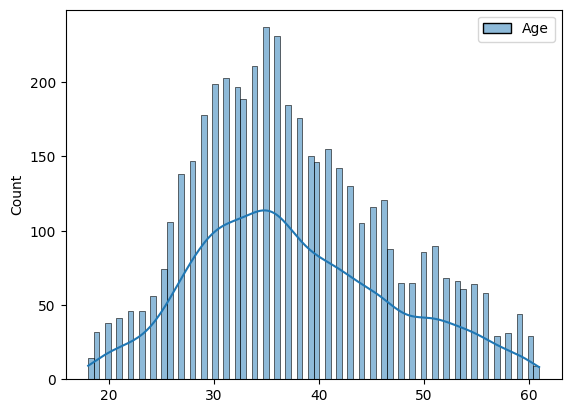

In [55]:
sns.histplot(df[['Age']],bins=80,kde=True)

In [56]:
rank_columns_by_group_age_variance(df,'Age')

,Mean_Age_Variance
MaritalStatus,87.464025
Gender,87.318242
TypeofContact,84.049271
Occupation,67.823323
ProductPitched,56.551667
Designation,56.551667


<Axes: xlabel='Age', ylabel='Density'>

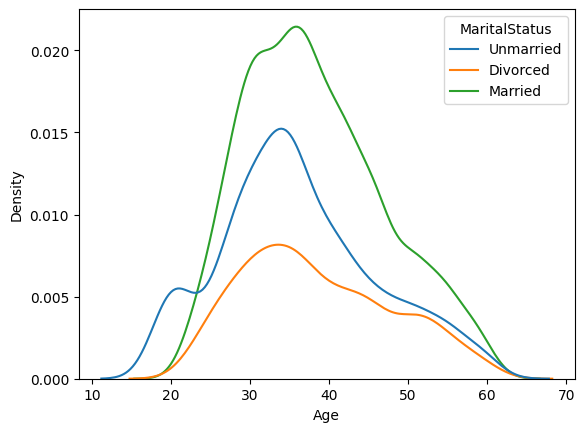

In [57]:
sns.kdeplot(data=df,x='Age',hue='MaritalStatus')

In [58]:
nulls_by_group(df,'Designation','Age')

,Designation,Age_Null_Count
1,Executive,144
0,Manager,81
2,Senior Manager,1
3,AVP,0
4,VP,0


In [59]:
mean_age_by_group(df,'MaritalStatus','Age')

,MaritalStatus,Mean_Age
1,Divorced,38.556906
2,Married,38.264614
0,Unmarried,36.114776


In [60]:
# Creating a Function to return values:
def impute_age(cols):
    Age = cols[0]
    marr = cols[1]
    
    if pd.isnull(Age):
        if marr == 'Divorced':
            return 39
        elif marr == 'Married':
            return 38
        elif marr == 'Unmarried':
            return 36
        elif marr== 'Single':
            return 35
    else:
        return Age

In [61]:
df['Age']=df[['Age','MaritalStatus']].apply(impute_age,axis=1)

In [62]:
df['Age'].isnull().sum()

0

### Filling the Null values in the [DurationOfPitch] columns 

In [63]:
df['DurationOfPitch'].isnull().sum()

251

<Axes: ylabel='Count'>

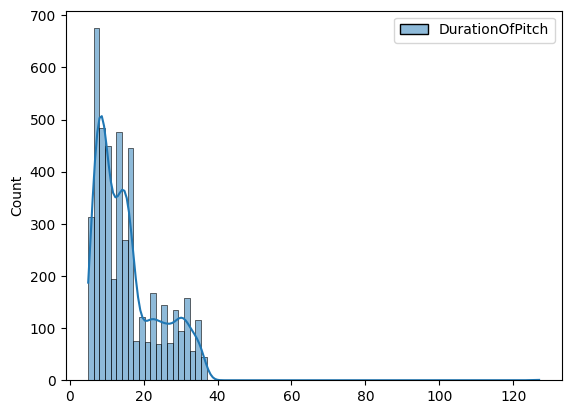

In [64]:
sns.histplot(df[['DurationOfPitch']],bins=80,kde=True)

In [65]:
rank_columns_by_group_age_variance(df,'DurationOfPitch')

,Mean_DurationOfPitch_Variance
TypeofContact,78.082567
Gender,72.098918
MaritalStatus,71.824348
ProductPitched,67.720407
Designation,67.720407
Occupation,53.355634


<Axes: xlabel='DurationOfPitch', ylabel='Density'>

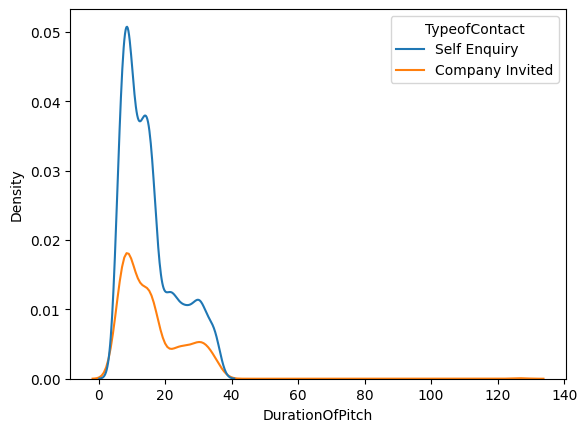

In [66]:
sns.kdeplot(data=df,x='DurationOfPitch',hue='TypeofContact')

In [67]:
nulls_by_group(df,'TypeofContact','DurationOfPitch')

,TypeofContact,DurationOfPitch_Null_Count
0,Self Enquiry,141
1,Company Invited,85


In [68]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                           0
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [69]:
smart_group_mean_imputer(df,'DurationOfPitch','median')

🔍 Ranked columns by group-wise variance of 'DurationOfPitch' (high to low):
1. TypeofContact - Avg Group Variance: 78.0826
2. Gender - Avg Group Variance: 72.0989
3. MaritalStatus - Avg Group Variance: 71.8243
4. ProductPitched - Avg Group Variance: 67.7204
5. Designation - Avg Group Variance: 67.7204
6. Occupation - Avg Group Variance: 53.3556

🔢 Total missing values before group-wise imputation: 251
✅ Tried column 'TypeofContact', missing values remaining: 25
✅ Tried column 'Gender', missing values remaining: 0

🎉 All missing values in 'DurationOfPitch' filled using group-wise means.


,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,39.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [70]:
df['DurationOfPitch'].isnull().sum()

0

### Filling the Null values in the [NumberOfTrips] columns 

In [71]:
df['NumberOfTrips'].isnull().sum()

140

<Axes: ylabel='Count'>

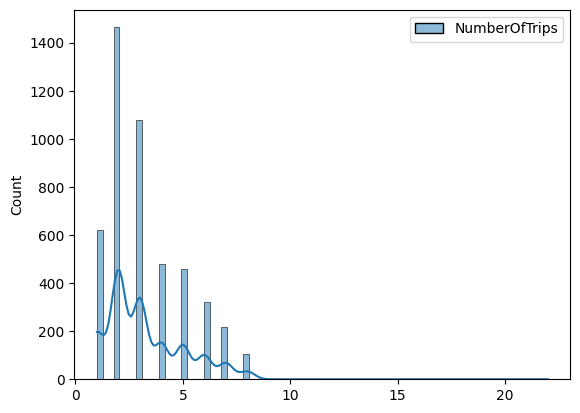

In [72]:
sns.histplot(df[['NumberOfTrips']],bins=80,kde=True)

In [73]:
rank_columns_by_group_age_variance(df,'NumberOfTrips')

,Mean_NumberOfTrips_Variance
TypeofContact,3.558075
ProductPitched,3.442882
Designation,3.442882
MaritalStatus,3.400057
Gender,3.382491
Occupation,2.927403


<Axes: xlabel='NumberOfTrips', ylabel='Density'>

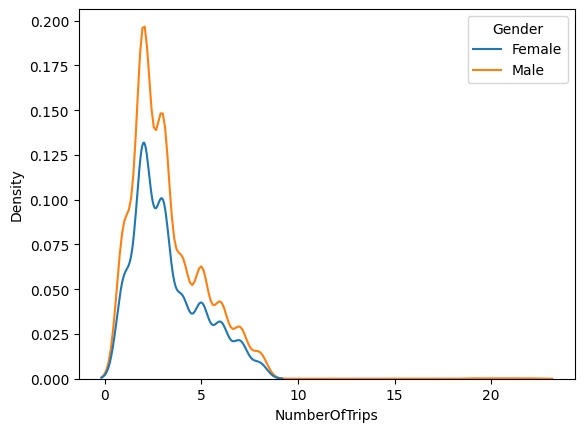

In [74]:
sns.kdeplot(data=df,x='NumberOfTrips',hue='Gender')

In [75]:
nulls_by_group(df,'Gender','NumberOfTrips')

,Gender,NumberOfTrips_Null_Count
1,Male,96
0,Female,44


In [76]:
smart_group_mean_imputer(df,'NumberOfTrips','median')

🔍 Ranked columns by group-wise variance of 'NumberOfTrips' (high to low):
1. TypeofContact - Avg Group Variance: 3.5581
2. ProductPitched - Avg Group Variance: 3.4429
3. Designation - Avg Group Variance: 3.4429
4. MaritalStatus - Avg Group Variance: 3.4001
5. Gender - Avg Group Variance: 3.3825
6. Occupation - Avg Group Variance: 2.9274

🔢 Total missing values before group-wise imputation: 140
✅ Tried column 'TypeofContact', missing values remaining: 0

🎉 All missing values in 'NumberOfTrips' filled using group-wise means.


,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,39.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


### Filling the Null values in the MonthlyIncome columns 

In [77]:
df['MonthlyIncome'].nunique()

2475

In [78]:
df['MonthlyIncome'].isnull().sum()

233

<Axes: ylabel='Count'>

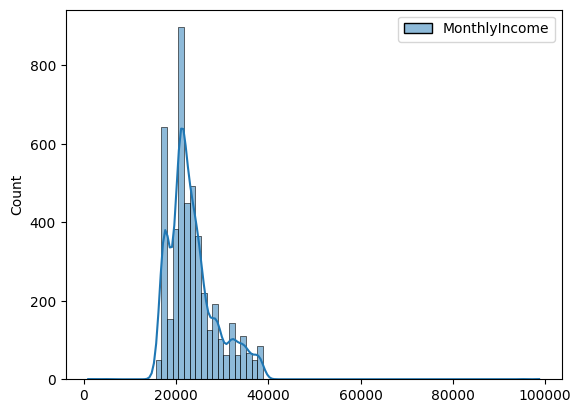

In [79]:
sns.histplot(df[['MonthlyIncome']],bins=80,kde=True)

In [80]:
rank_columns_by_group_age_variance(df,'MonthlyIncome')

,Mean_MonthlyIncome_Variance
MaritalStatus,3.053693e+07
Gender,2.946050e+07
TypeofContact,2.737225e+07
Occupation,2.225243e+07
ProductPitched,8.268270e+06
Designation,8.268270e+06


<Axes: xlabel='MonthlyIncome', ylabel='Density'>

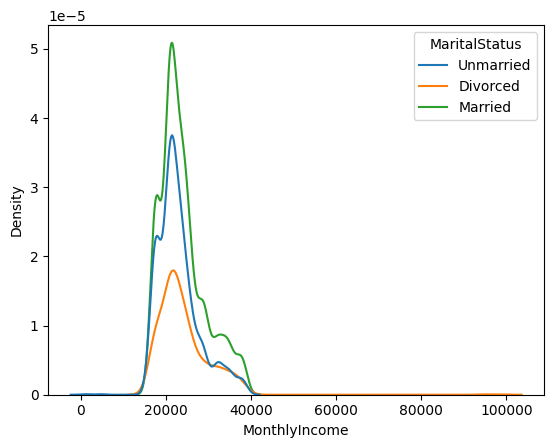

In [81]:
sns.kdeplot(data=df,x='MonthlyIncome',hue='MaritalStatus')

In [82]:
nulls_by_group(df,'MaritalStatus','MonthlyIncome')

,MaritalStatus,MonthlyIncome_Null_Count
2,Married,112
0,Unmarried,73
1,Divorced,48


In [83]:
smart_group_mean_imputer(df,'MonthlyIncome','mean')

🔍 Ranked columns by group-wise variance of 'MonthlyIncome' (high to low):
1. MaritalStatus - Avg Group Variance: 30536928.5172
2. Gender - Avg Group Variance: 29460504.8625
3. TypeofContact - Avg Group Variance: 27372252.5276
4. Occupation - Avg Group Variance: 22252426.5301
5. ProductPitched - Avg Group Variance: 8268269.5951
6. Designation - Avg Group Variance: 8268269.5951

🔢 Total missing values before group-wise imputation: 233
✅ Tried column 'MaritalStatus', missing values remaining: 0

🎉 All missing values in 'MonthlyIncome' filled using group-wise means.


,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,39.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [84]:
df['MonthlyIncome'].isnull().sum()

0

### Filling the Null values in the TypeofContact columns 

In [85]:
df['TypeofContact'].isnull().sum()

25

In [86]:
a=df['TypeofContact'].mode()

In [87]:
df['TypeofContact'] = df['TypeofContact'].fillna(a[0])

In [88]:
df['TypeofContact'].isnull().sum()

0

### Filling the Null values in the TypeofContact columns 

In [89]:
df['NumberOfFollowups'].nunique()

6

In [90]:
df['NumberOfFollowups'].isnull().sum()

45

In [91]:
a=df['NumberOfFollowups'].mode()
df['NumberOfFollowups'] = df['NumberOfFollowups'].fillna(a[0])

In [92]:
df['NumberOfFollowups'].isnull().sum()

0

### Filling the Null values in the PreferredPropertyStar columns 

In [93]:
df['PreferredPropertyStar'].nunique()

3

In [94]:
df['PreferredPropertyStar'].isnull().sum()

26

In [95]:
a=df['PreferredPropertyStar'].mode()
df['PreferredPropertyStar'] = df['PreferredPropertyStar'].fillna(a[0])

In [96]:
df['PreferredPropertyStar'].isnull().sum()

0

### Filling the Null values in the NumberOfChildrenVisiting columns 

In [97]:
df['NumberOfChildrenVisiting'].nunique()

4

In [98]:
df['NumberOfChildrenVisiting'].isnull().sum()

66

In [99]:
a=df['NumberOfChildrenVisiting'].mode()
df['NumberOfChildrenVisiting'] = df['NumberOfChildrenVisiting'].fillna(a[0])

In [100]:
df['NumberOfChildrenVisiting'].isnull().sum()

0

In [101]:
df.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

## 3.5.Trying to Reduce The Features By Combining

In [102]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,39.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


we can combine the numberpersonvistting and the numberofchildrenvisting cloumns into one as total Visitting

In [103]:
df['TotalVisting']=df['NumberOfChildrenVisiting']+df['NumberOfPersonVisiting']
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,...,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,TotalVisting
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,...,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0,3.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,...,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0,5.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,...,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0,3.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,...,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0,3.0
4,200004,0,39.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,...,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0,2.0


In [104]:
# Removing the columns numberpersonvistting and numberofchildrenvisting
df.drop(columns=['NumberOfPersonVisiting','NumberOfChildrenVisiting'],inplace=True)

In [105]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisting
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,200004,0,39.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [106]:
# Droping the CustomerID column
df.drop(columns=['CustomerID'],inplace=True)

## 3.4.Handling the Outliers

_________________________________________________________

Column: ProdTaken
Unique Values :2
Lower Bound: 0.0
Upper Bound: 0.0
Outliers:
      ProdTaken
0             1
2             1
14            1
21            1
24            1
...         ...
4883          1
4884          1
4885          1
4886          1
4887          1

[920 rows x 1 columns]


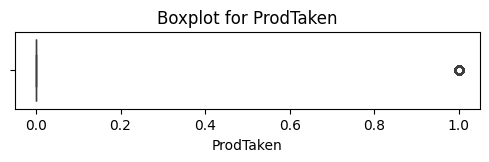

_________________________________________________________

Column: Age
Unique Values :44
Lower Bound: 7.0
Upper Bound: 67.0
Outliers:
Empty DataFrame
Columns: [Age]
Index: []


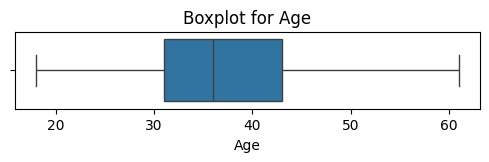

_________________________________________________________

Column: CityTier
Unique Values :3
Lower Bound: -3.0
Upper Bound: 7.0
Outliers:
Empty DataFrame
Columns: [CityTier]
Index: []


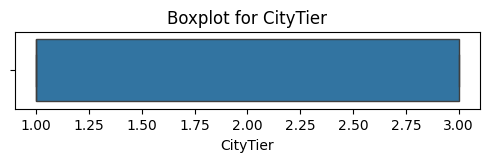

_________________________________________________________

Column: DurationOfPitch
Unique Values :38
Lower Bound: -11.0
Upper Bound: 39.0
Outliers:
      DurationOfPitch
1434            126.0
3878            127.0


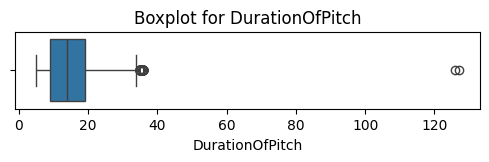

_________________________________________________________

Column: NumberOfFollowups
Unique Values :6
Lower Bound: 1.0
Upper Bound: 6.0
Outliers:
Empty DataFrame
Columns: [NumberOfFollowups]
Index: []


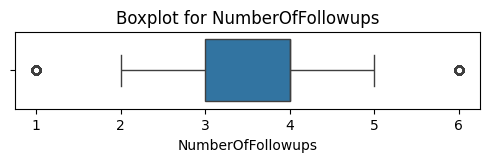

_________________________________________________________

Column: PreferredPropertyStar
Unique Values :3
Lower Bound: 1.0
Upper Bound: 6.0
Outliers:
Empty DataFrame
Columns: [PreferredPropertyStar]
Index: []


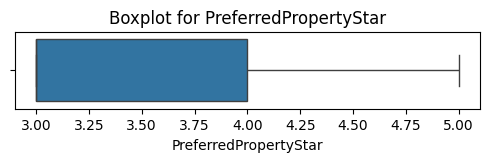

_________________________________________________________

Column: NumberOfTrips
Unique Values :14
Lower Bound: -2.0
Upper Bound: 8.0
Outliers:
      NumberOfTrips
385            19.0
816            21.0
2829           20.0
3260           22.0


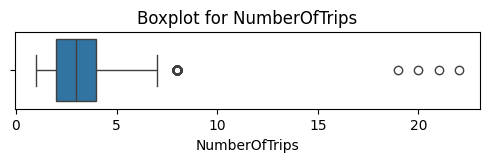

_________________________________________________________

Column: Passport
Unique Values :2
Lower Bound: -2.0
Upper Bound: 3.0
Outliers:
Empty DataFrame
Columns: [Passport]
Index: []


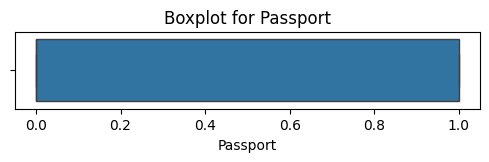

_________________________________________________________

Column: PitchSatisfactionScore
Unique Values :5
Lower Bound: -2.0
Upper Bound: 8.0
Outliers:
Empty DataFrame
Columns: [PitchSatisfactionScore]
Index: []


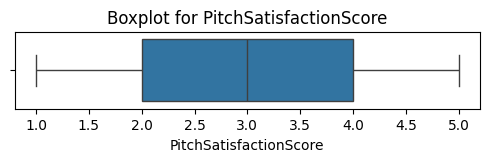

_________________________________________________________

Column: OwnCar
Unique Values :2
Lower Bound: -2.0
Upper Bound: 3.0
Outliers:
Empty DataFrame
Columns: [OwnCar]
Index: []


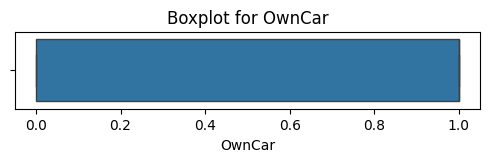

_________________________________________________________

Column: MonthlyIncome
Unique Values :2478
Lower Bound: 10605.5
Upper Bound: 35304.25
Outliers:
      MonthlyIncome
38          95000.0
142          1000.0
2469        37772.0
2473        37625.0
2482        98678.0
...             ...
4851        35801.0
4859        35558.0
4868        36539.0
4869        37865.0
4870        38395.0

[200 rows x 1 columns]


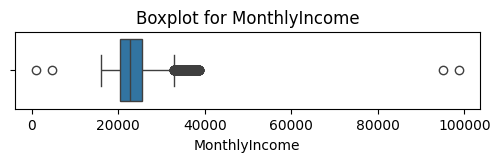

_________________________________________________________

Column: TotalVisting
Unique Values :7
Lower Bound: -1.0
Upper Bound: 9.0
Outliers:
Empty DataFrame
Columns: [TotalVisting]
Index: []


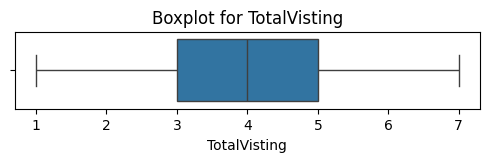

In [107]:
for col in df.select_dtypes(include='number').columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 2 * IQR
    upper_bound = Q3 + 2 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print("_________________________________________________________")
    print(f"\nColumn: {col}")
    print(f"Unique Values :{df[col].nunique()}")
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    print(f"Outliers:\n{outliers[[col]]}")

    # Boxplot
    plt.figure(figsize=(6, 1))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
    plt.show()


### Outliers in
DurationOfPitch

NumberOfTrips

In [108]:
# winsorization-Replacing the the values with most permissble values i..ee  lower and upper bounds

def replace_outliers(dataframe,feature):
    Q1=dataframe[feature].quantile(0.25)
    Q3=dataframe[feature].quantile(0.75)

    IQR=Q3-Q1

    upper_bound=Q3+2*IQR  
    lower_bound=Q1-2*IQR

    # capping-replacing all higher values with upper bound (75% percentile)
    dataframe[feature]=np.where(dataframe[feature]>upper_bound,upper_bound,dataframe[feature])
    # flooring -replace all lower values with lower bounf (25% percentile)
    dataframe[feature]=np.where(dataframe[feature]<lower_bound,lower_bound,dataframe[feature])

In [109]:
replace_outliers(df,'DurationOfPitch')
replace_outliers(df,'NumberOfTrips')

# 4.Feature Selection

In [110]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisting
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,0,39.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [111]:
# numerical features:
num_col=[i for i in df.columns if df[i].dtype != 'O']
print("Numerical Columns:")
for i in range(0,len(num_col)):
    print(f"{i+1}.{num_col[i]}")

Numerical Columns:
1.ProdTaken
2.Age
3.CityTier
4.DurationOfPitch
5.NumberOfFollowups
6.PreferredPropertyStar
7.NumberOfTrips
8.Passport
9.PitchSatisfactionScore
10.OwnCar
11.MonthlyIncome
12.TotalVisting


In [112]:
# Categorical Features
cat_col=[i for i in df.columns if df[i].dtype == 'O']
print("Categorical Columns:")
for i in range(0,len(cat_col)):
    print(f"{i+1}.{cat_col[i]}")

Categorical Columns:
1.TypeofContact
2.Occupation
3.Gender
4.ProductPitched
5.MaritalStatus
6.Designation


In [113]:
# Discrete Features
dis_col=[i for i in num_col if df[i].nunique()<25]
print("Discrete Columns:")
for i in range(0,len(dis_col)):
    print(f"{i+1}.{dis_col[i]}")

Discrete Columns:
1.ProdTaken
2.CityTier
3.NumberOfFollowups
4.PreferredPropertyStar
5.NumberOfTrips
6.Passport
7.PitchSatisfactionScore
8.OwnCar
9.TotalVisting


In [114]:
# Continuous Features
con_col=[i for i in num_col if df[i].nunique()>25]
print("Continuous Columns:")
for i in range(0,len(con_col)):
    print(f"{i+1}.{con_col[i]}")

Continuous Columns:
1.Age
2.DurationOfPitch
3.MonthlyIncome


### Feature Selection Between Continuous & Binary Columns

In [115]:
from scipy.stats import ttest_ind
for i in con_col:
    print(f"Column Name {i}")
    # Group by Status
    class0 = df[df['ProdTaken'] == 0][i]
    class1 = df[df['ProdTaken'] == 1][i]

    # t-test,p-val
    t_stat, p_val = ttest_ind(class0,class1)

    print('P-value:', p_val)

    if p_val < 0.05:
        print("Reject Null Hypothesis")
    else:
        print("Fail to Reject Null Hypothesis")
    print()

Column Name Age
P-value: 2.6551264958504734e-24
Reject Null Hypothesis

Column Name DurationOfPitch
P-value: 1.2444855714691237e-08
Reject Null Hypothesis

Column Name MonthlyIncome
P-value: 1.5838383403027969e-19
Reject Null Hypothesis



### Feature Selection for Binary Categorical and Discrete Features:

In [116]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(df[dis_col], df['ProdTaken'])

importances = model.feature_importances_
feat_importance = pd.DataFrame({
    'Feature': df[dis_col].columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feat_importance)


                  Feature  Importance
0               ProdTaken    0.924182
5                Passport    0.034526
2       NumberOfFollowups    0.008932
4           NumberOfTrips    0.008124
3   PreferredPropertyStar    0.006527
6  PitchSatisfactionScore    0.006088
1                CityTier    0.005306
8            TotalVisting    0.004448
7                  OwnCar    0.001866


In [117]:
from sklearn.feature_selection import SelectKBest, chi2

# Convert categorical binary columns to numeric if needed
X = df[dis_col]  # discrete features
y = df['ProdTaken']  # binary target

# Make sure X is non-negative for chi2
X_encoded = pd.get_dummies(X, drop_first=True)

selector = SelectKBest(score_func=chi2, k='all')
chi2_scores = selector.fit(X_encoded, y)

feature_scores = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Chi2 Score': chi2_scores.scores_,
    'p-value': chi2_scores.pvalues_
}).sort_values(by='Chi2 Score', ascending=False)

print(feature_scores)


                  Feature   Chi2 Score       p-value
0               ProdTaken  3968.000000  0.000000e+00
5                Passport   235.825285  3.198986e-53
1                CityTier    18.721582  1.512608e-05
2       NumberOfFollowups    16.332394  5.314761e-05
3   PreferredPropertyStar     8.452716  3.644986e-03
6  PitchSatisfactionScore     7.822561  5.159804e-03
4           NumberOfTrips     1.110133  2.920531e-01
7                  OwnCar     0.245803  6.200462e-01
8            TotalVisting     0.227716  6.332229e-01


In [118]:
df.drop(columns=['OwnCar','TotalVisting'],inplace=True)

# 5. Enoding 

In [119]:
cat_col

['TypeofContact',
 'Occupation',
 'Gender',
 'ProductPitched',
 'MaritalStatus',
 'Designation']

In [120]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder ()
for i in cat_col:
    df[i]=label.fit_transform(df[i])
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,Designation,MonthlyIncome
0,1,41.0,1,3,6.0,2,0,3.0,1,3.0,2,1.0,1,2,2,20993.0
1,0,49.0,0,1,14.0,2,1,4.0,1,4.0,0,2.0,0,3,2,20130.0
2,1,37.0,1,1,8.0,0,1,4.0,0,3.0,2,7.0,1,3,1,17090.0
3,0,33.0,0,1,9.0,2,0,3.0,0,3.0,0,2.0,1,5,1,17909.0
4,0,39.0,1,1,8.0,3,1,3.0,0,4.0,0,1.0,0,5,1,18468.0


# 6.Splitting 

## 6.1.Independent and Dependent

In [121]:
x=df.iloc[:,1:]
y=df.iloc[:,0]

## 6.2.train test split

In [122]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=50)

# 7.Sampling

In [123]:
y_train.value_counts()

ProdTaken
0    2995
1     671
Name: count, dtype: int64

In [125]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
x_train_sampled, y_train_sampled = smote.fit_resample(x_train, y_train)


In [126]:
y_train_sampled.value_counts()

ProdTaken
0    2995
1    2995
Name: count, dtype: int64

In [127]:
x_train_sampled.shape

(5990, 15)

# 8. Scaling 

In [128]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaler=scaler.fit_transform(x_train_sampled)
x_test_scaler=scaler.transform(x_test)

In [129]:
x_train_scaler.shape

(5990, 15)

# 9.Models

1. Logistic Regression
2. SVM
3. K Nearest Neighbour
4. Decision Tree

### Evaluation Metrics
1. Accuracy
2. Confusion Matrix
3. Classification

In [130]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report,precision_score,recall_score,f1_score

In [133]:
# Importing the models
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay,precision_score, recall_score, f1_score, roc_auc_score,roc_curve 

In [139]:
models={
    "Logisitic Regression":LogisticRegression(),
    "SVM":svm.SVC(),
    "KNN":KNeighborsClassifier(),
    "Decision Tree":DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "AdaBoost":AdaBoostClassifier(),
    "Gradient Boost": GradientBoostingClassifier(),
    "XG Boost": XGBClassifier()
}
model_name=list(models.keys())

# List of models that need unscaled data
tree_based_models = ["Decision Tree", "Random Forest", "AdaBoost", "Gradient Boost", "XG Boost"]

for i in range(len(list(models))):
    model = list(models.values())[i]
    
    if model_name in tree_based_models:
        model.fit(x_train_sampled, y_train_sampled)
        # Make predictions:
        y_train_pred = model.predict(x_train_sampled)
        y_test_pred = model.predict(x_test)
    else:
        # Model Training
        model.fit(x_train_scaler, y_train_sampled)
        # Make predictions:
        y_train_pred = model.predict(x_train_scaler)
        y_test_pred = model.predict(x_test_scaler)

    
    # Training set performance
    model_train_accuracy = accuracy_score(y_train_sampled, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train_sampled, y_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(y_train_sampled, y_train_pred) # Calculate Precision
    model_train_recall = recall_score(y_train_sampled, y_train_pred) # Calculate Recall
    model_train_rocauc_score = roc_auc_score(y_train_sampled, y_train_pred)


    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc


    print(f"-------{list(models.keys())[i]}-------")
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

    
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))


    
    print('----------------------------------')
    print(classification_report(y_test,y_test_pred))
    
    print('='*35)
    print('\n')

-------Logisitic Regression-------
Model performance for Training set
- Accuracy: 0.7125
- F1 score: 0.7125
- Precision: 0.7124
- Recall: 0.7129
- Roc Auc Score: 0.7125
----------------------------------
Model performance for Test set
- Accuracy: 0.6923
- F1 score: 0.7186
- Precision: 0.3579
- Recall: 0.6426
- Roc Auc Score: 0.6738
----------------------------------
              precision    recall  f1-score   support

           0       0.89      0.71      0.78       973
           1       0.36      0.64      0.46       249

    accuracy                           0.69      1222
   macro avg       0.62      0.67      0.62      1222
weighted avg       0.78      0.69      0.72      1222



-------SVM-------
Model performance for Training set
- Accuracy: 0.9062
- F1 score: 0.9062
- Precision: 0.9035
- Recall: 0.9095
- Roc Auc Score: 0.9062
----------------------------------
Model performance for Test set
- Accuracy: 0.8437
- F1 score: 0.8502
- Precision: 0.5918
- Recall: 0.7510
- Roc Auc

# Hyper parameter Tunning For XG Boost:

In [100]:
from sklearn.model_selection import GridSearchCV

model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='accuracy',  
    cv=3,                
    verbose=2,
    n_jobs=-1
)

In [102]:
grid_search.fit(x_train, y_train)

# Best params and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Fitting 3 folds for each of 48 candidates, totalling 144 fits


C:\Users\Vikram MVR\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
10 fits failed out of a total of 144.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Vikram MVR\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Vikram MVR\anaconda3\Lib\site-packages\xgboost\core.py", line 729, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Vikram MVR\anaconda3\Lib\site-packages\xgboost\sklearn.py", line 1663, in fit
    train_dmatrix, evals = _wrap_evaluation_matrices(
    

Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1.0}
Best Score: 0.9192580469176214


# Tuned Model:

In [135]:
tuned_model = XGBClassifier(colsample_bytree=0.8,learning_rate=0.1, max_depth=7,n_estimators=200,subsample=1.0)
tuned_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [136]:
tuned_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [137]:
y_train_pred = tuned_model.predict(x_train_sampled)
y_test_pred = tuned_model.predict(x_test)

In [138]:
model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc

print('----------------------------------')
    
print('Tuned XG Boost Model performance ')
print('- Accuracy: {:.4f}'.format(model_test_accuracy))
print('- F1 score: {:.4f}'.format(model_test_f1))
print('- Precision: {:.4f}'.format(model_test_precision))
print('- Recall: {:.4f}'.format(model_test_recall))
print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

print('----------------------------------')


----------------------------------
Tuned XG Boost Model performance 
- Accuracy: 0.9247
- F1 score: 0.9205
- Precision: 0.9198
- Recall: 0.6908
- Roc Auc Score: 0.8377
----------------------------------
